# 1 Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias

# importe de librerias 

In [162]:
# librerias necesarias 
import pandas as pd # realiza el manejo y analisis de estructura de datos 
import seaborn as sns # creacion graficos estadisticos 
import matplotlib.pyplot as plt # creacion de graficos en dos dimenciones 
import numpy as np # calculo numerico y el analisis de datos

# librerias para implemertar modelos de ciencias de datos 

from sklearn.model_selection import train_test_split # comvertir losd datos a train y test
from sklearn import metrics #utlizacion de las metricas 
from sklearn.linear_model import LinearRegression, Lasso, Ridge # realizar modelo regresion lineal con lasso y ridge
from sklearn.metrics import mean_squared_error, classification_report
from sklearn.preprocessing import StandardScaler #estandarizacion de caracteristicas 
from sklearn.metrics import precision_score, recall_score, f1_score # utilizacion de metricas 
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error,max_error #utilizacion de metricas 

from sklearn.preprocessing import OneHotEncoder #es una técnica de codificación utilizada para convertir variables categóricas en vectores numéricos binarios. Crea una nueva columna para cada categoría en la variable categórica y asigna un valor binario (1 o 0) a cada columna dependiendo de si la observación pertenece a esa categoría o no
from sklearn.compose import ColumnTransformer #es una clase que permite aplicar transformaciones específicas a columnas específicas de tus datos. Te permite seleccionar qué transformaciones aplicar a qué columnas y luego combinarlas en un único transformador



# cargar todos los datos 

In [163]:
# lista de las rutas de los archivos CSV

archivo1_csv ='C:/Users/leidy/Documents/ingenieria de sistemas ivan castro/SEXTO SEMESTRE/Analisis de Datos/actividad 3/Nueva carpeta/Anexo 2 - Dataset Vehicle/Car details v3.csv'

# Carga el archivo CSV en un DataFrame
DataFrame1 = pd.read_csv(archivo1_csv)

In [42]:
# Muestra las primeras filas del DataFrame para verificar que se ha cargado correctamente
DataFrame1.head(50)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.0


# obtener informacion sobre las variables en conjunto de datos

In [164]:
DataFrame1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


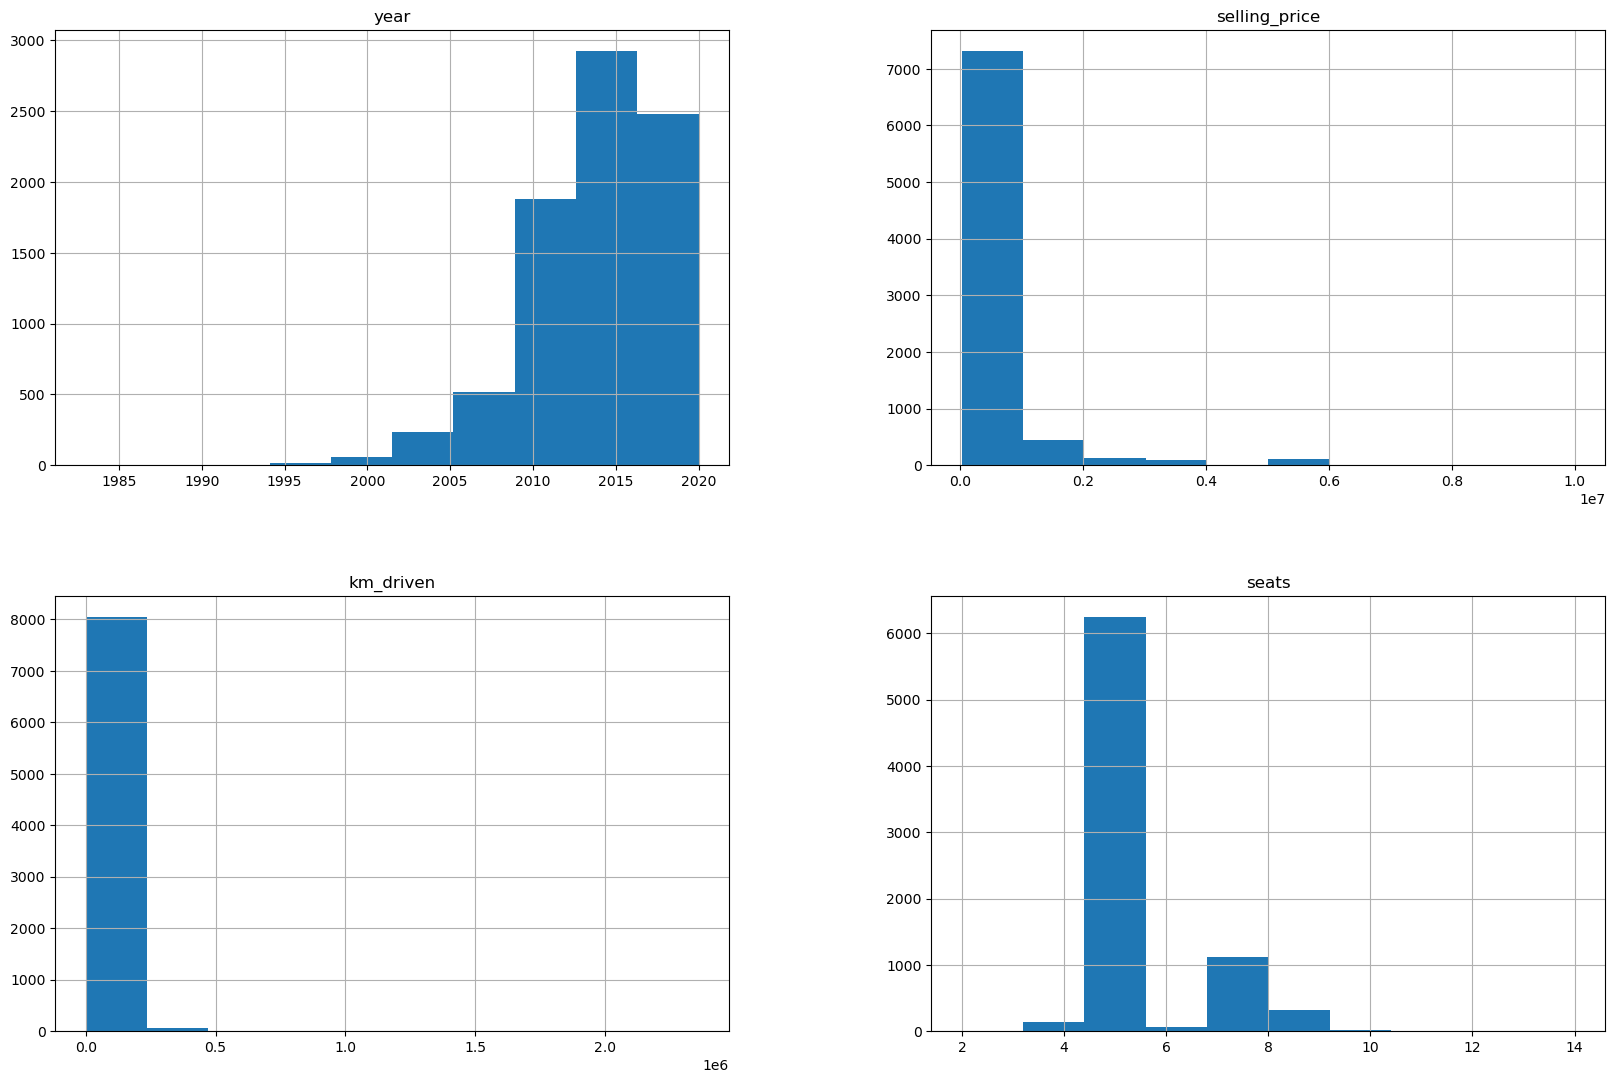

In [165]:
# se muestra un histograma para observar los datos agregados 
DataFrame1.hist(figsize =(20,13))
plt.show()

In [45]:
# muestra la descripcion de los datos 
DataFrame1.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [166]:

# seleccionar los datos de tipo float64 y int 64 
# Seleccionar solo las columnas numéricas
datos_numericos = DataFrame1.select_dtypes(include=['float64', 'int64'])


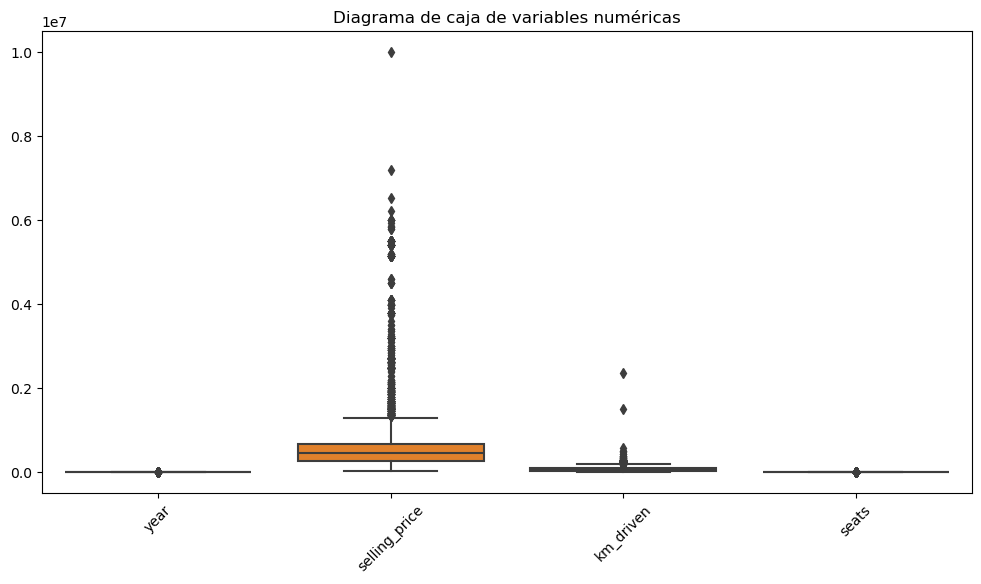

In [50]:
# Identificar valores atípicos

plt.figure(figsize=(12, 6))
sns.boxplot(data = datos_numericos  )
plt.title('Diagrama de caja de variables numéricas')
plt.xticks(rotation=45)
plt.show()

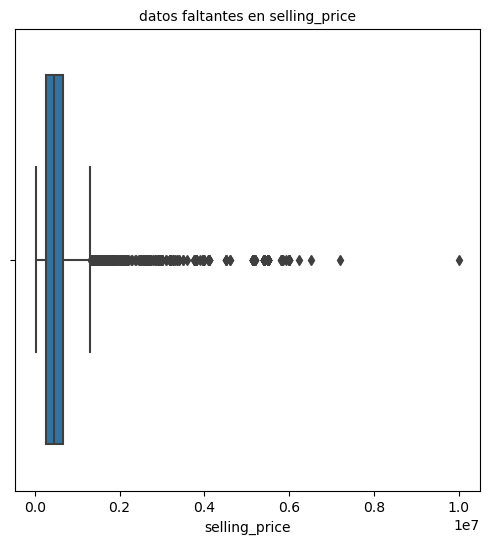

In [167]:
# Identificar valores atípicos

plt.figure(figsize=(6, 6))
sns.boxplot(x= datos_numericos['selling_price']  )
plt.title('datos faltantes en selling_price',fontsize=10)
plt.show()


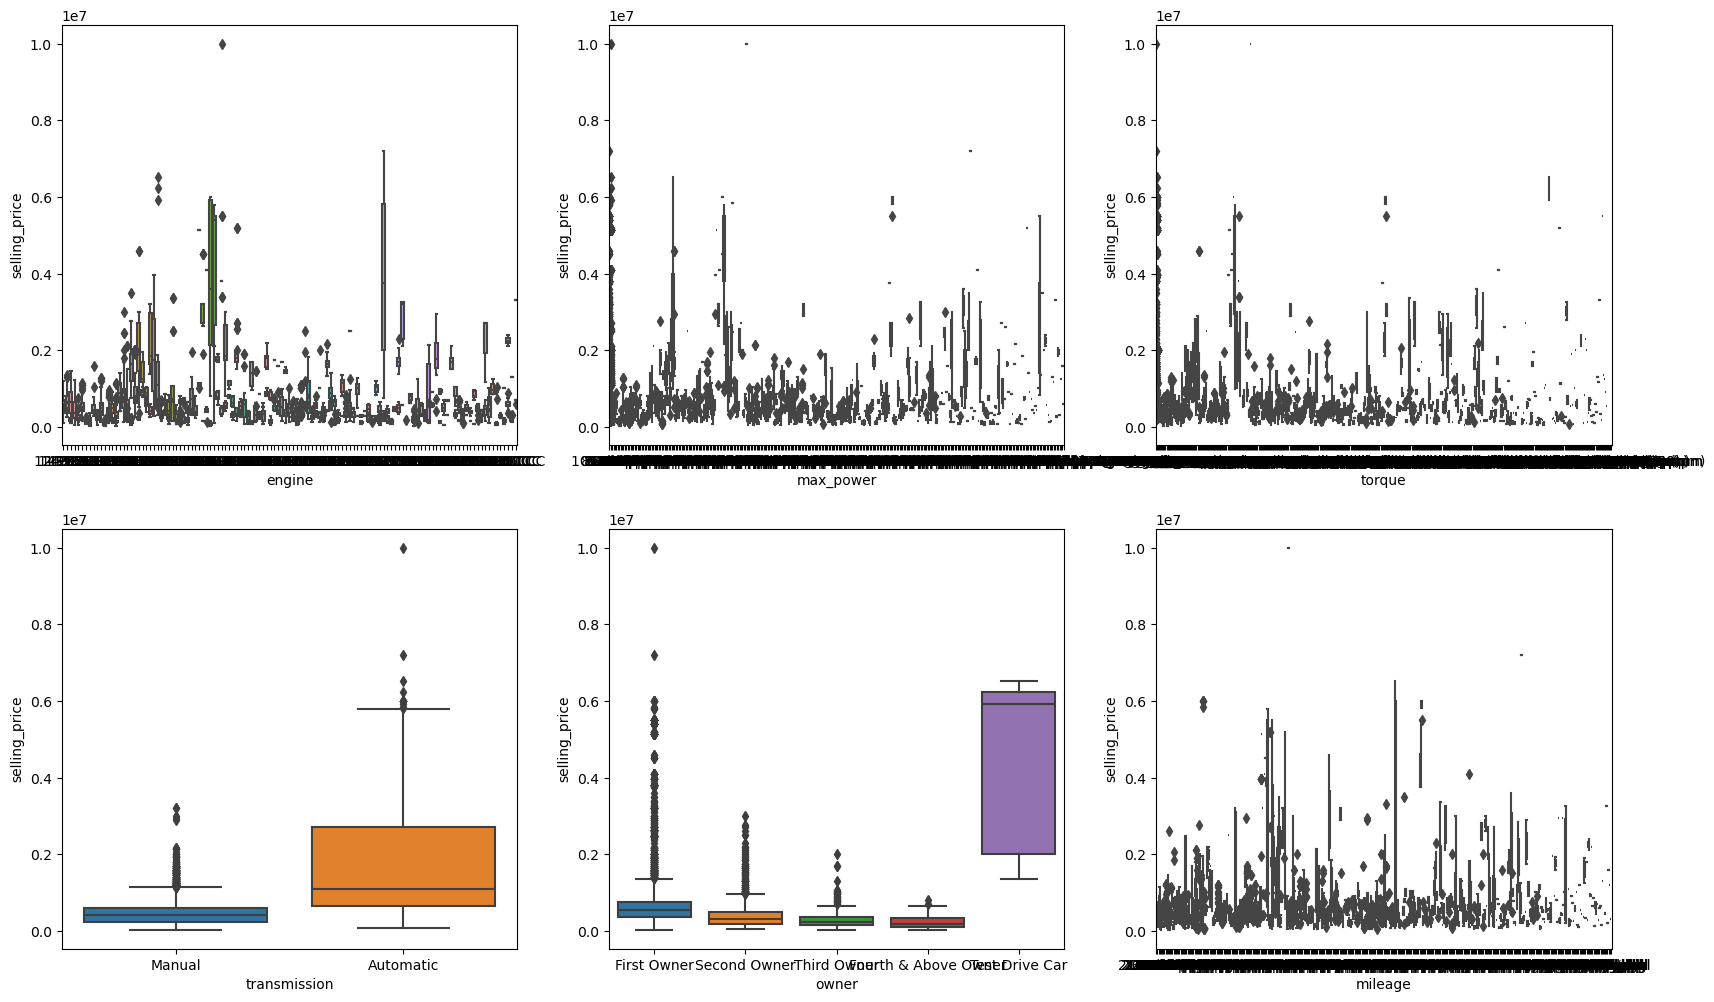

In [137]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'name', y = 'selling_price', data = DataFrame1)
plt.subplot(2,3,2)
sns.boxplot(x = 'fuel', y = 'selling_price', data = DataFrame1)
plt.subplot(2,3,3)
sns.boxplot(x = 'seller_type', y = 'selling_price', data = DataFrame1)
plt.subplot(2,3,4)
sns.boxplot(x = 'transmission', y = 'selling_price', data = DataFrame1)
plt.subplot(2,3,5)
sns.boxplot(x = 'owner', y = 'selling_price', data = DataFrame1)
plt.subplot(2,3,6)
sns.boxplot(x = 'mileage', y = 'selling_price', data = DataFrame1)
plt.subplot(2,3,1)
sns.boxplot(x = 'engine', y = 'selling_price', data = DataFrame1)
plt.subplot(2,3,2)
sns.boxplot(x = 'max_power', y = 'selling_price', data = DataFrame1)
plt.subplot(2,3,3)
sns.boxplot(x = 'torque', y = 'selling_price', data = DataFrame1)

plt.show()

In [168]:
DataFrame1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


# 2 Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario. 

In [169]:
#ver que datos faltantes hay
print("año: ",DataFrame1['year'].isin([0]).sum())
print("precio de venta: ",DataFrame1['selling_price'].isin([0]).sum())
print("km recorridos: ",DataFrame1['km_driven'].isin([0]).sum())
print("kilometraje: ",DataFrame1['mileage'].isin([0]).sum())
print("motor: ",DataFrame1['engine'].isin([0]).sum())
print("maximo poder: ",DataFrame1['max_power'].isin([0]).sum())
print("esfuerzo de torsion: ",DataFrame1['torque'].isin([0]).sum())
print("asientos: ",DataFrame1['seats'].isin([0]).sum())


año:  0
precio de venta:  0
km recorridos:  0
kilometraje:  0
motor:  0
maximo poder:  0
esfuerzo de torsion:  0
asientos:  0


In [170]:
# IDENTIFICAR DATOS ATIPICOS EN LAS VARIABLES O COLUMNAS 


# Calcula el rango intercuartílico (IQR) para cada columna
Q1 = datos_numericos.quantile(0.25)
Q3 = datos_numericos.quantile(0.75)
IQR = Q3 - Q1

# Define un criterio para identificar valores atípicos
valores_atipicos = (datos_numericos < (Q1 - 1.5 * IQR)) | (datos_numericos > (Q3 + 1.5 * IQR))

# Cuenta la cantidad de valores atípicos en cada columna
valoresatipicos_count = valores_atipicos.sum()
print("Cantidad de valores atípicos en cada columna:")
print(valoresatipicos_count)


Cantidad de valores atípicos en cada columna:
year               81
selling_price     600
km_driven         170
seats            1653
dtype: int64


In [171]:
# Reemplazar valores atípicos con el valor medio de cada columna
for column in datos_numericos.columns:
    median = datos_numericos[column].median()
    datos_numericos.loc[datos_numericos[column] > 1.5 * median, column] = median

In [172]:

# Filtrar el conjunto de datos original utilizando los valores modificados
Datos = DataFrame1.copy()  # Crear una copia del DataFrame original
for column in datos_numericos.columns:
     Datos = Datos.loc[Datos[column].isin(datos_numericos[column])]
     print(Datos)


   

                              name  year  selling_price  km_driven    fuel  \
0           Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1     Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2         Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3        Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4           Maruti Swift VXI BSIII  2007         130000     120000  Petrol   
...                            ...   ...            ...        ...     ...   
8123             Hyundai i20 Magna  2013         320000     110000  Petrol   
8124         Hyundai Verna CRDi SX  2007         135000     119000  Diesel   
8125        Maruti Swift Dzire ZDi  2009         382000     120000  Diesel   
8126               Tata Indigo CR4  2013         290000      25000  Diesel   
8127               Tata Indigo CR4  2013         290000      25000  Diesel   

     seller_type transmission                 owner     mileage

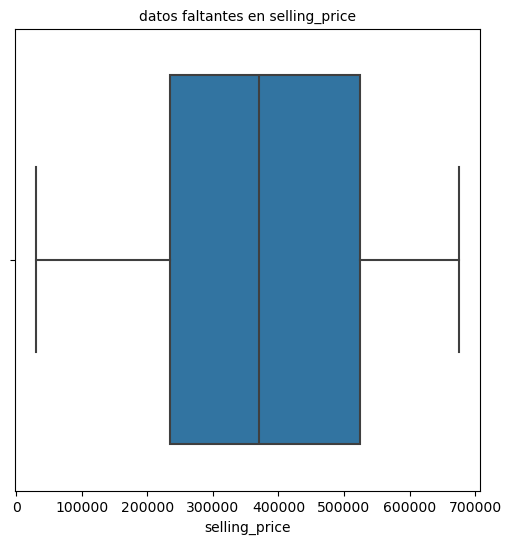

In [173]:
# Identificar valores atípicos

plt.figure(figsize=(6, 6))
sns.boxplot(x= Datos['selling_price']  )
plt.title('datos faltantes en selling_price',fontsize=10)
plt.show()


In [68]:
Datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4153 entries, 5 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           4153 non-null   object 
 1   year           4153 non-null   int64  
 2   selling_price  4153 non-null   int64  
 3   km_driven      4153 non-null   int64  
 4   fuel           4153 non-null   object 
 5   seller_type    4153 non-null   object 
 6   transmission   4153 non-null   object 
 7   owner          4153 non-null   object 
 8   mileage        4027 non-null   object 
 9   engine         4027 non-null   object 
 10  max_power      4031 non-null   object 
 11  torque         4027 non-null   object 
 12  seats          4027 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 454.2+ KB


# 3 Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.

In [69]:
print(Datos.columns)


Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')


In [70]:
# Convertir variables categóricas en numéricas utilizando codificación one-hot
Datos = pd.get_dummies(Datos, columns=['name', 'year', 'fuel', 'seller_type','transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque','seats'])


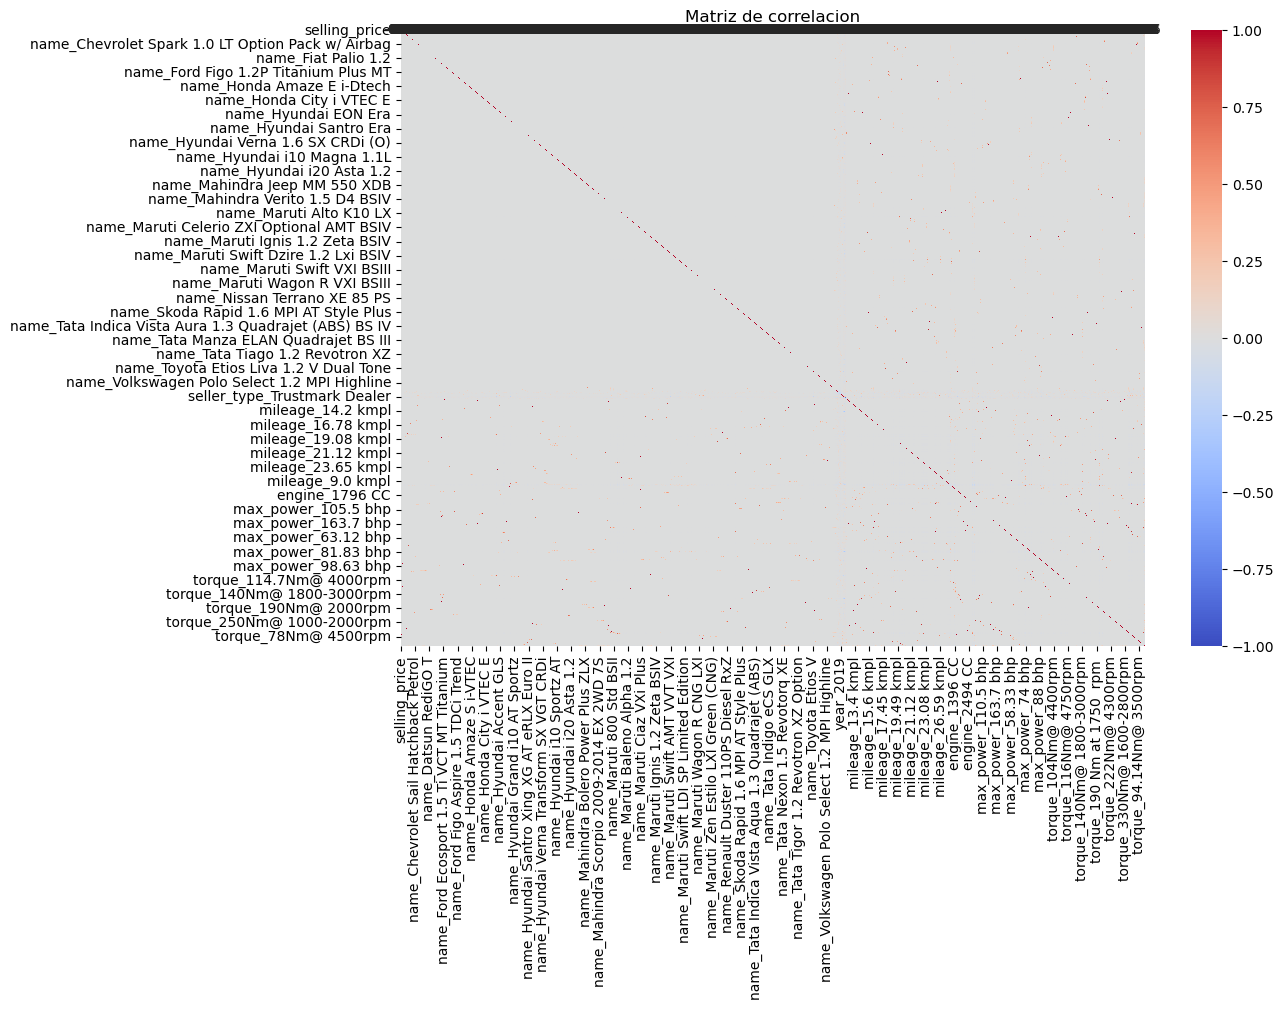

In [79]:
# analisis de correlacion
      
correlacion = Datos.corr()
plt.figure(figsize =(12,8))
sns.heatmap(correlacion, annot = True, cmap ='coolwarm', fmt =".2f")
plt.title('Matriz de correlacion')
plt.show()

In [71]:
#verificar que variables tienen mas correlaciones
correlacion_variableobjetivo = correlacion['selling_price'].abs().sort_values(ascending = False)
variables_mascorrelacionadas = correlacion_variableobjetivo[1:]
print(variables_mascorrelacionadas)

owner_First Owner                         0.365550
engine_796 CC                             0.352364
km_driven                                 0.299779
engine_1197 CC                            0.293853
seats_4.0                                 0.262709
                                            ...   
name_Hyundai i10 Sportz 1.1L LPG          0.000033
name_Maruti Swift 1.2 DLX (Only Delhi)    0.000033
name_Honda City 1.5 V Elegance            0.000033
name_Maruti Celerio VDi                   0.000033
mileage_21.94 km/kg                       0.000030
Name: selling_price, Length: 2095, dtype: float64


In [186]:
# Definir las columnas a transformar y el tipo de transformación para cada una
columnas_transformadas = [
    ('name', OneHotEncoder(), ['name']),  # Codificación one-hot para la variable 'nombre'
    ('fuel', OneHotEncoder(), ['fuel']),  # Codificación one-hot para la variable 'combustible'
    ('seller_type', OneHotEncoder(), ['seller_type']),  # Codificación one-hot para la variable 'tipo_vendedor'
    ('transmission', OneHotEncoder(), ['transmission']),  # Codificación one-hot para la variable 'tipo_vendedor'
    ('owner', OneHotEncoder(), ['owner']),  # Codificación one-hot para la variable 'tipo_vendedor'
    ('mileage', OneHotEncoder(), ['mileage']),  # Codificación one-hot para la variable 'tipo_vendedor'
    ('engine', OneHotEncoder(), ['engine']),  # Codificación one-hot para la variable 'tipo_vendedor'
    ('max_power', OneHotEncoder(), ['max_power']),  # Codificación one-hot para la variable 'tipo_vendedor'
    ('torque', OneHotEncoder(), ['torque'])  # Codificación one-hot para la variable 'tipo_vendedor'
   
]
# crear el transformador para las variables categoricas 
transformador = ColumnTransformer(transformers=columnas_transformadas)

In [188]:
# Obtener las características más relevantes (por ejemplo, las 5 más relevantes)
#caracteristicas_rel = variables_mascorrelacionadas.index[:10]

# Dividir los datos en características (X) y variable objetivo (y)
X = Datos.drop('selling_price',axis=1)  # Excluir la variable objetivo
y = Datos['selling_price']

In [189]:
# Aplicar el transformador a las características
X_transformado = transformador.fit_transform(X)

In [190]:
# mostrar las caracteristicas de x
print("caracteristicas x")
print(X)


caracteristicas x
                                   name  year  km_driven    fuel seller_type  \
5         Hyundai Xcent 1.2 VTVT E Plus  2017      45000  Petrol  Individual   
7                    Maruti 800 DX BSII  2001       5000  Petrol  Individual   
8                      Toyota Etios VXD  2011      90000  Diesel  Individual   
10      Renault Duster 110PS Diesel RxL  2014      68000  Diesel  Individual   
13                 Maruti Swift 1.3 VXi  2007      80000  Petrol  Individual   
...                                 ...   ...        ...     ...         ...   
8119        Maruti Wagon R LXI Optional  2017      80000  Petrol  Individual   
8121  Maruti Wagon R VXI BS IV with ABS  2013      50000  Petrol  Individual   
8122         Hyundai i20 Magna 1.4 CRDi  2014      80000  Diesel  Individual   
8126                    Tata Indigo CR4  2013      25000  Diesel  Individual   
8127                    Tata Indigo CR4  2013      25000  Diesel  Individual   

     transmission    

In [177]:
#mostrar las caracteristicas de y
print("caracteristicas y")
print(y.head())

caracteristicas y
5     440000
7      45000
8     350000
10    500000
13    200000
Name: selling_price, dtype: int64


In [178]:
# muestra si hay datos NaN en la variable x 
nan_values_X = X.isna().sum()
print("Valores NaN en las características seleccionadas (X):")
print(nan_values_X)

Valores NaN en las características seleccionadas (X):
name              0
year              0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage         126
engine          126
max_power       122
torque          126
seats           126
dtype: int64


In [179]:
# muestra si hay datos NaN en la variable x 
nan_values_y = y.isna().sum()
print("Valores NaN en la variable objetivo (y):")
print(nan_values_y)

Valores NaN en la variable objetivo (y):
0


# 4. Dividir el dataset en Train y Test para evaluar correctamente el modelo.

In [191]:
# Dividir los datos imputados en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_transformado, y, test_size=0.25, random_state=0)


In [192]:
print("Conjunto de entrenamiento - Características (X_train):")
print(X_train)

Conjunto de entrenamiento - Características (X_train):
  (0, 933)	1.0
  (0, 1215)	1.0
  (0, 1217)	1.0
  (0, 1220)	1.0
  (0, 1221)	1.0
  (0, 1448)	1.0
  (0, 1588)	1.0
  (0, 1710)	1.0
  (0, 2052)	1.0
  (1, 506)	1.0
  (1, 1213)	1.0
  (1, 1217)	1.0
  (1, 1220)	1.0
  (1, 1221)	1.0
  (1, 1297)	1.0
  (1, 1575)	1.0
  (1, 1697)	1.0
  (1, 1943)	1.0
  (2, 41)	1.0
  (2, 1215)	1.0
  (2, 1217)	1.0
  (2, 1220)	1.0
  (2, 1221)	1.0
  (2, 1341)	1.0
  (2, 1586)	1.0
  :	:
  (3111, 1217)	1.0
  (3111, 1220)	1.0
  (3111, 1223)	1.0
  (3111, 1375)	1.0
  (3111, 1581)	1.0
  (3111, 1671)	1.0
  (3111, 2026)	1.0
  (3112, 382)	1.0
  (3112, 1213)	1.0
  (3112, 1217)	1.0
  (3112, 1220)	1.0
  (3112, 1221)	1.0
  (3112, 1437)	1.0
  (3112, 1544)	1.0
  (3112, 1633)	1.0
  (3112, 1996)	1.0
  (3113, 314)	1.0
  (3113, 1215)	1.0
  (3113, 1217)	1.0
  (3113, 1220)	1.0
  (3113, 1221)	1.0
  (3113, 1358)	1.0
  (3113, 1518)	1.0
  (3113, 1749)	1.0
  (3113, 1834)	1.0


In [193]:
print("\nConjunto de entrenamiento - Variable objetivo (y_train):")
print(y_train)


Conjunto de entrenamiento - Variable objetivo (y_train):
3639    300000
1949    600000
2431     45000
2676    450000
1445    450000
         ...  
1999    650000
6374    400000
3128    170000
5068    432000
5332    562000
Name: selling_price, Length: 3114, dtype: int64


In [194]:
print("\nConjunto de prueba - Características (X_test):")
print(X_test)


Conjunto de prueba - Características (X_test):
  (0, 779)	1.0
  (0, 1213)	1.0
  (0, 1217)	1.0
  (0, 1220)	1.0
  (0, 1221)	1.0
  (0, 1454)	1.0
  (0, 1521)	1.0
  (0, 1732)	1.0
  (0, 1941)	1.0
  (1, 292)	1.0
  (1, 1215)	1.0
  (1, 1217)	1.0
  (1, 1220)	1.0
  (1, 1221)	1.0
  (1, 1409)	1.0
  (1, 1583)	1.0
  (1, 1682)	1.0
  (1, 2033)	1.0
  (2, 208)	1.0
  (2, 1215)	1.0
  (2, 1216)	1.0
  (2, 1220)	1.0
  (2, 1221)	1.0
  (2, 1352)	1.0
  (2, 1519)	1.0
  :	:
  (1036, 1217)	1.0
  (1036, 1220)	1.0
  (1036, 1221)	1.0
  (1036, 1352)	1.0
  (1036, 1518)	1.0
  (1036, 1745)	1.0
  (1036, 1821)	1.0
  (1037, 957)	1.0
  (1037, 1215)	1.0
  (1037, 1216)	1.0
  (1037, 1219)	1.0
  (1037, 1221)	1.0
  (1037, 1268)	1.0
  (1037, 1551)	1.0
  (1037, 1599)	1.0
  (1037, 1908)	1.0
  (1038, 779)	1.0
  (1038, 1213)	1.0
  (1038, 1217)	1.0
  (1038, 1220)	1.0
  (1038, 1221)	1.0
  (1038, 1490)	1.0
  (1038, 1521)	1.0
  (1038, 1732)	1.0
  (1038, 1941)	1.0


In [195]:
print("\nConjunto de prueba - Variable objetivo (y_test):")
print(y_test.head())


Conjunto de prueba - Variable objetivo (y_test):
2689    490000
1946    444000
8055    245000
8085    300000
6772    100000
Name: selling_price, dtype: int64


# 3 Entrenar el modelo configurando los diferentes hiperparámetros.

In [196]:
#construccion del modelo de regresion lineal 
model = LinearRegression()
model.fit(X_train, y_train)

# se crea el modelo de prediccion
prediccion = model.predict(X_test) # funcion predict predice los valores a partir del conjuto de datos de validacion


In [197]:
print (y_test)

2689    490000
1946    444000
8055    245000
8085    300000
6772    100000
         ...  
654     550000
2356    295000
6992    220000
4251    645000
8117    625000
Name: selling_price, Length: 1039, dtype: int64


In [210]:
print(prediccion)

[498687.29446738 254774.20023895 454208.57658105 ... 357887.57816762
 624341.67281849 590804.2027095 ]


# Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.

In [199]:
# Calcular métricas de regresión
mse = mean_squared_error(y_test, prediccion)
rmse = mean_squared_error(y_test, prediccion, squared=False)  # Calcular RMSE
mae = mean_absolute_error(y_test, prediccion)
r2 = r2_score(y_test, prediccion)

# Imprimir las métricas
print("Error cuadrático medio (MSE):", mse)
print("Raíz del error cuadrático medio (RMSE):", rmse)
print("Error absoluto medio (MAE):", mae)
print("Coeficiente de determinación (R^2):", r2)

Error cuadrático medio (MSE): 5788269942.896794
Raíz del error cuadrático medio (RMSE): 76080.68048392308
Error absoluto medio (MAE): 54545.85379522164
Coeficiente de determinación (R^2): 0.8014425541833703


# Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.


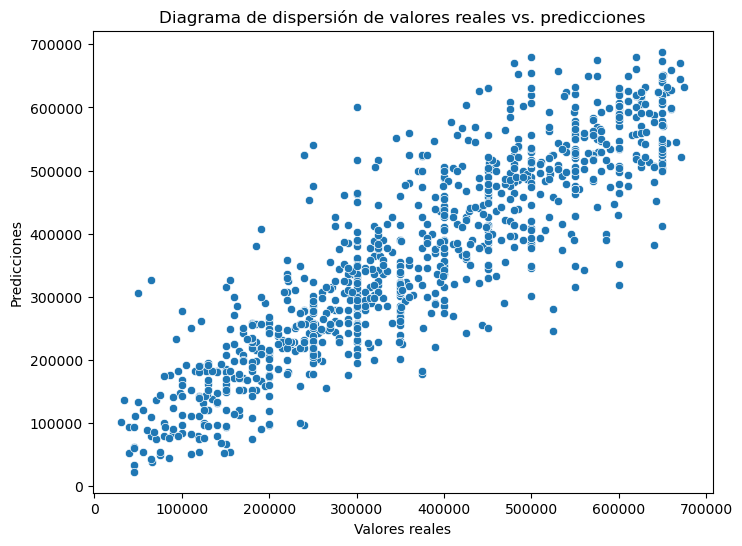

C:\Users\leidy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


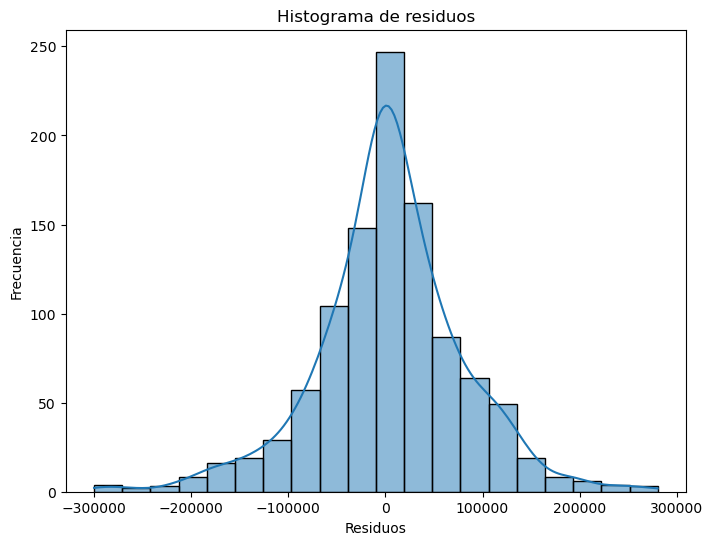

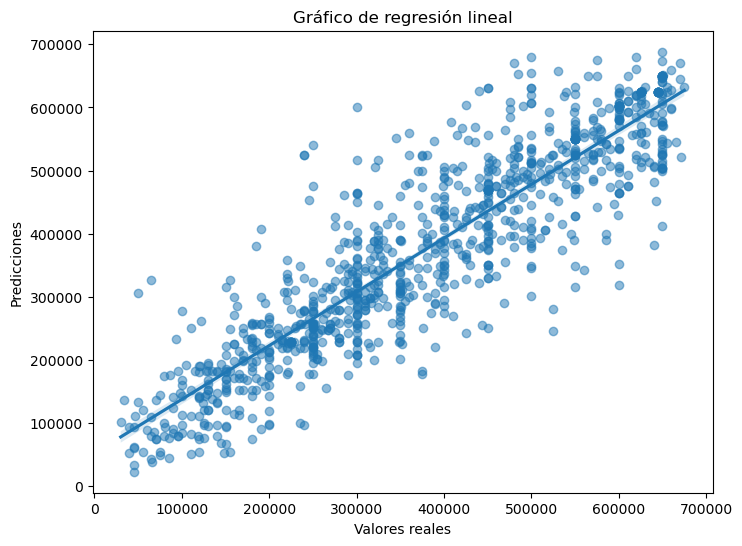

In [200]:
# Diagrama de dispersión de valores reales vs. predicciones
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=prediccion)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Diagrama de dispersión de valores reales vs. predicciones')
plt.show()

# Histograma de residuos
residuos = y_test - prediccion
plt.figure(figsize=(8, 6))
sns.histplot(residuos, bins=20, kde=True)
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Histograma de residuos')
plt.show()

# Gráfico de regresión lineal
plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=prediccion, scatter_kws={'alpha':0.5})
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Gráfico de regresión lineal')
plt.show()